# Convolutional Neural Network (CNN) Fire Detection

In [14]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# PART 1: Building the CNN

In [15]:
# A. Import the Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
# B. Initializing the CNN
classifier = Sequential()
  
# C. Creating the Convolutional Layer of the First Convolutional Block
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides =  (1,1), input_shape = (64,64,3), activation = "relu"))

# D. Creating the Pooling Layer of the First Convolutional Block
classifier.add (MaxPooling2D(pool_size = (2,2)))

# E. Creating the Convolutional Layer of the Second Convolutional Block
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides =  (1,1), activation = "relu"))

# F. Creating the Pooling Layer of the Second Convolutional Block
classifier.add (MaxPooling2D(pool_size = (2,2)))

# G. To Perform Flattening 
classifier.add(Flatten())

# H. Creating the Fully Connected Layer
 
# H.1 For the First Hidden Layer 
classifier.add(Dense(units = 64, kernel_initializer = "glorot_uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

# H.2 For the Second Hidden Layer 
classifier.add(Dense(units = 64, kernel_initializer = "glorot_uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

# H.3 For the Output Layer 
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

# I. Compiling the CNN
classifier.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy", "mse"])

print(classifier.summary())


C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,497 (3.15 MB)

 Trainable params: 826,497 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

None


# PART 2: Data Distribution

['Deep_Problem_3', 'single_prediction', 'Test', 'Train', 'Vali']
The Number of Samples for the Training Data Fire Category:
3003
The Number of Samples for the Training Data Non-Fire Category:
3000


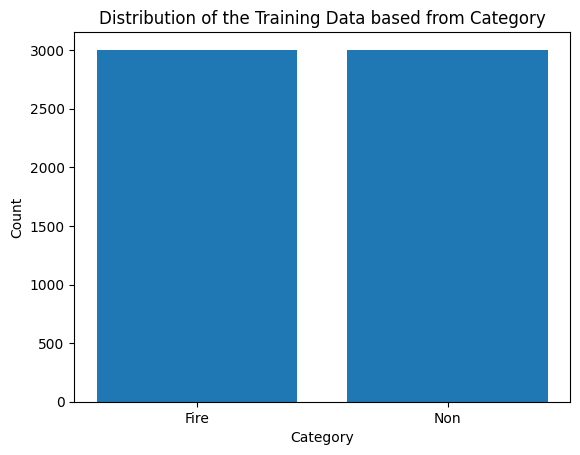

The Number of Samples for the Testing Data Fire Category:
1000
The Number of Samples for the Testing Data Non Category:
1000


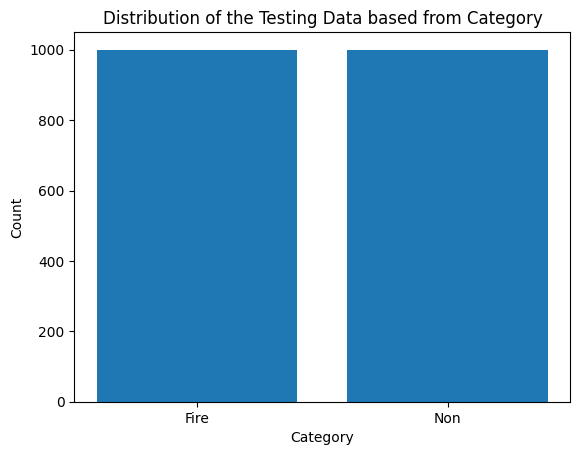

In [38]:
# A. For the Creation of the Training Dataset and Testing Dataset Directory

import os 
print(os.listdir("dataset"))

from pathlib import Path
data_directory = Path("dataset/")
train_directory = data_directory/"train"
test_directory = data_directory/"test"

# B. For the Training Dataset data Distribution

def load_train():
    Fire_directory = train_directory/"Fire"
    Non_directory = train_directory/"Non"
    
    # Get the List of all the Images
    Fire = Fire_directory.glob("*.jpg")
    Non = Non_directory.glob("*.jpg")
    train_data = []
    train_label = []
    
    for img in Fire: 
        train_data.append(img)
        train_label.append("Fire")

    for img in Non: 
        train_data.append(img)
        train_label.append("Non")
        
    dataframe = pd.DataFrame(train_data)
    dataframe.columns = ["images"]
    dataframe["labels"] = train_label
    dataframe = dataframe.sample(frac = 1).reset_index(drop = True)
    return dataframe

train_data = load_train()
train_data.shape 

index_training_data = train_data["labels"].value_counts().index
values_training_data = train_data["labels"].value_counts().values
train_data_distribution = [index_training_data , values_training_data]
print("The Number of Samples for the Training Data Fire Category:")
print(values_training_data[0])
print("The Number of Samples for the Training Data Non-Fire Category:")
print(values_training_data[1])

plt.bar(index_training_data , values_training_data)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of the Training Data based from Category")
plt.show()


# C. For the Testing Dataset data Distribution

def load_test():
    Fire_directory = test_directory/"Fire"
    Non_directory = test_directory/"Non"
    
    # Get the List of all the Images
    Fire = Fire_directory.glob("*.jpg")
    Non = Non_directory.glob("*.jpg")
    test_data = []
    test_label = []
    
    for img in Fire: 
        test_data.append(img)
        test_label.append("Fire")

    for img in Non: 
        test_data.append(img)
        test_label.append("Non")
        
    dataframe = pd.DataFrame(test_data)
    dataframe.columns = ["images"]
    dataframe["labels"] = test_label
    dataframe = dataframe.sample(frac = 1).reset_index(drop = True)
    return dataframe

test_data = load_test()
test_data.shape 

index_testing_data = test_data["labels"].value_counts().index
values_testing_data = test_data["labels"].value_counts().values
test_data_distribution = [index_testing_data , values_testing_data]
print("The Number of Samples for the Testing Data Fire Category:")
print(values_testing_data[0])
print("The Number of Samples for the Testing Data Non Category:")
print(values_testing_data[1])

plt.bar(index_testing_data , values_testing_data)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of the Testing Data based from Category")
plt.show()

# PART 3: Citting the CNN Model to the Images

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)


training_set = train_datagenerator.flow_from_directory(
    "dataset/train",
    target_size=(64, 64),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False)


test_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)

testing_set = test_datagenerator.flow_from_directory(
    "dataset/test",
    target_size=(64, 64),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False)

records = classifier.fit(training_set,
                         steps_per_epoch = 250, # training data/batch size = 8048/32 =251.5
                         epochs = 50, 
                         validation_data = testing_set,
                         validation_steps = 62,
) # testing data/batch size = 2000/32 = 62.5


# 8048 / 32 = 252 approx
# divide the whole testing dataset sa no. of epoch
# 2000 / 32 = 63 


# To Save the Trained Model

classifier.save("cnn.h5")
print("Classifier Saved on the Disk")

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/50


C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/250 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6267 - loss: 0.6322 - mse: 0.2215

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.6385 - loss: 0.6227 - mse: 0.2172 - val_accuracy: 0.6275 - val_loss: 0.6750 - val_mse: 0.2356
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7737 - loss: 0.4859 - mse: 0.1588 - val_accuracy: 0.7883 - val_loss: 0.4402 - val_mse: 0.1407
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8142 - loss: 0.4162 - mse: 0.1317 - val_accuracy: 0.8044 - val_loss: 0.4300 - val_mse: 0.1363
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8320 - loss: 0.3938 - mse: 0.1239 - val_accuracy: 0.7989 - val_loss: 0.4293 - val_mse: 0.1383
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.8542 - loss: 0.3465 - mse: 0.1062 - val_accuracy: 0.7747 - val_loss: 0.5135 - val_mse: 0.1631
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.8517 - loss: 0.3349 - mse: 0.1036 - val_accuracy: 0.8427 - val_loss: 0.3657 - val_mse: 0.1166
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━

Classifier Saved on the Disk


# PART 4: Plotting the Loss, Accuracy and MSE Charts

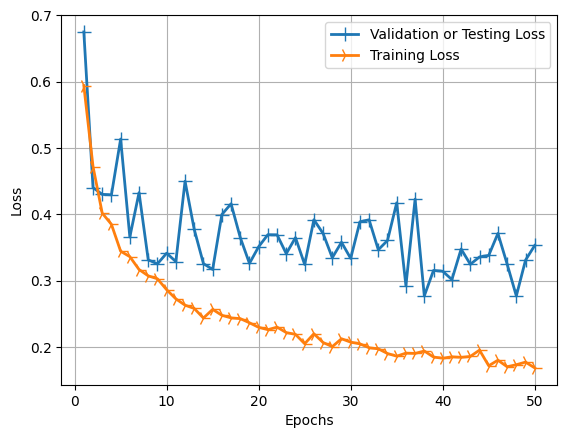

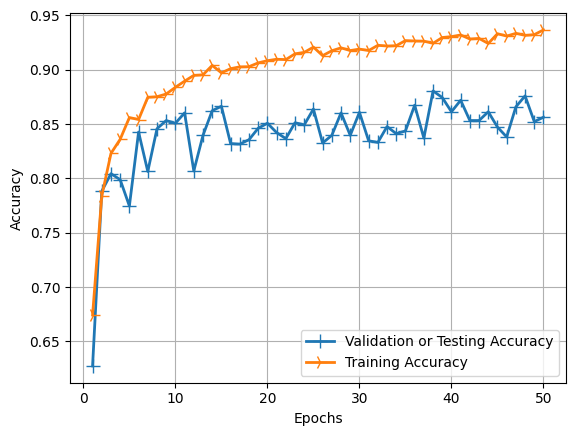

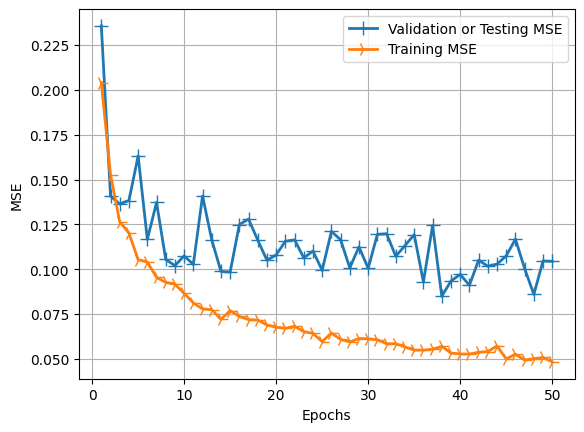

In [11]:
# A.Plotting the loss Chart

classifier_dictionary = records.history
 
training_loss_values = classifier_dictionary["loss"]
validation_loss_values = classifier_dictionary["val_loss"]
epochs = range(1, len(training_loss_values) + 1)
 
line1 = plt.plot(epochs, validation_loss_values, label = "Validation or Testing Loss")
line2 = plt.plot(epochs, training_loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


# B. Plotting the Accuracy Charts
 
classifier_dictionary = records.history
 
training_accuracy_values = classifier_dictionary["accuracy"]
validation_accuracy_values = classifier_dictionary["val_accuracy"]
epochs = range(1, len(training_accuracy_values) + 1)
 
line1 = plt.plot(epochs, validation_accuracy_values, label = "Validation or Testing Accuracy")
line2 = plt.plot(epochs, training_accuracy_values, label = "Training Accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

 # C. Plotting the MSE Charts
 
classifier_dictionary = records.history
 
training_mse_values = classifier_dictionary["mse"]
validation_mse_values = classifier_dictionary["val_mse"]
epochs = range(1, len(training_mse_values) + 1)
 
line1 = plt.plot(epochs, validation_mse_values, label = "Validation or Testing MSE")
line2 = plt.plot(epochs, training_mse_values, label = "Training MSE")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

# PART 5: Evaluating the Performance of the Model Using the Testing Dataset

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8571 - loss: 0.3613 - mse: 0.1037

loss: 0.36359381675720215

compile_metrics: 0.8575000166893005
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


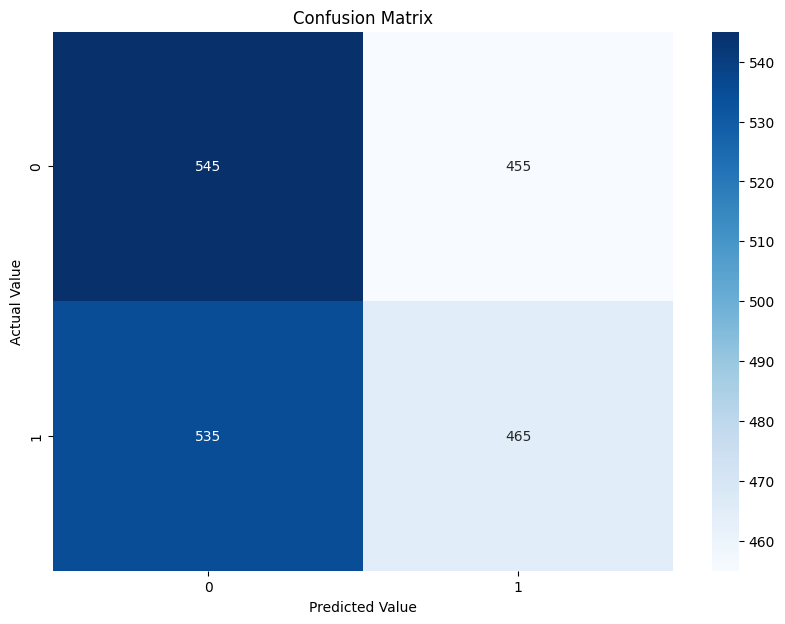

In [12]:
# Evaluate the Model on the Testing Dataset
evaluation_results = classifier.evaluate(testing_set, batch_size = 32, verbose = 1)

# To Print the Evaluation metrics 
for metric_name, metric_value in zip(classifier.metrics_names, evaluation_results):
    print("")
    print(f"{metric_name}: {metric_value}")
    
# To Get the Classifier Prediction using the Testing Dataset
prediction_probability = classifier.predict(testing_set)
prediction = np.rint(prediction_probability)

# To Generate the Testing Dataset Labels
testing_dataset_labels = test_data["labels"]
testing_dataset_labels = np.where(testing_dataset_labels == "Fire", 0, 1)
#testing_dataset_labels = testing_dataset_labels.values

#testing_dataset_labels = testing_set.classes

# To Generate the Plot of the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_dataset_labels, prediction)

# Conda install seaborn
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# PART 6: PERFORM HOLD-OUT VALIDATION TO ASSESS THE ARTIFICIAL NEURAL NETWORK MODEL'S PERFORMANCE

Classification Accuracy: 0.5050
 
Classification Error: 0.4950
 
Sensitivity: 0.4650
 
Specificity: 0.5450
 
False Positive Rate: 0.4550
 
Precision: 0.5054
 
F1-Score: 0.4844
 


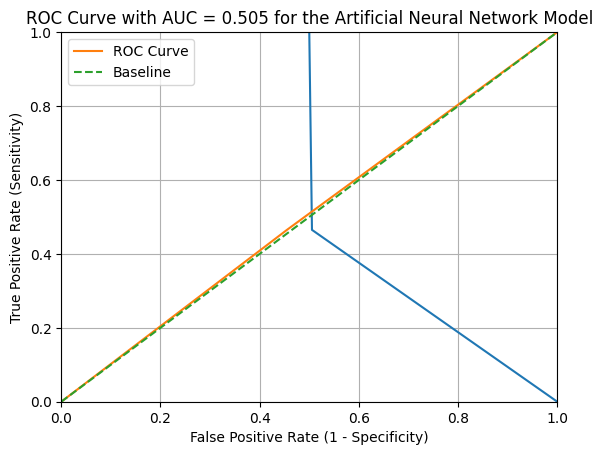

In [13]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

# A. For the Classification Accuracy
# Overall, how often is the classifier correct?
# It is the proportion of correct predictions over the total number of predictions.

from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Classification Accuracy: %.4f"
      %classification_accuracy)
print(' ')

# classification_accuracy = (TP+TN) / (TP + TN + FP + FN)

# B. For the Classification Error
# Overall, how often is the classifier incorrect?
# All false predictions over the total number of predictions.

classification_error = 1 - classification_accuracy
print("Classification Error: %.4f"
      %classification_error)
print(' ')

# classification_error = (FP + FN) / (TP + TN + FP + FN)

# C. For the Sensitivity, Recall Score, Probability of Detection, or True Positive Rate
# When the actual value is positive, how often is the prediction correct?
# Out of all actual Positives, how many did we predict as Positive?

from sklearn.metrics import recall_score
sensitivity = recall_score(testing_dataset_labels, prediction)
print('Sensitivity: %.4f' 
      % sensitivity)
print(' ')

# sensitivity = TP / (TP + FN)

# D. For the Specificity or True Negative Rate
# When the actual value is negative, how often is the prediction correct?
# Out of all actual Negatives, how many did we predict as Negative?

specificity = TN / (TN + FP)
print('Specificity: %.4f' 
      % specificity)
print(' ')

# E. For the False Positive Rate
# When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = 1 - specificity
print('False Positive Rate: %.4f' 
      % false_positive_rate)
print(' ')

# false_positive_rate = FN / (TN + FP)

# F. For the Precision or Positive Predictive Value 
# When a positive value is predicted, how often is the prediction correct?
# Out of all predicted Positive cases, how many were actually Positive?

from sklearn.metrics import precision_score
precision = precision_score(testing_dataset_labels, prediction)
print('Precision: %.4f' 
      % precision)
print(' ')

# precision = TP / (TP + FP)

# G. For the F1-Score
 # It is the harmonic, or weighted, an average of Precision and Sensitivity.

from sklearn.metrics import f1_score
f1_score = f1_score(testing_dataset_labels, prediction)
print('F1-Score: %.4f' 
      % f1_score)
print(' ')

# f1_score = 2*precision*sensitivity / (precision + sensitivity)

# H. For the Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(testing_dataset_labels, prediction)

# I. For the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_value, recall_value, threshold = precision_recall_curve(testing_dataset_labels, prediction)

plt.plot(precision_value, recall_value)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision-Recall Curve for the Artificial Neural Network Model")
plt.xlabel("Precision")
plt.ylabel("Recall")

# J. For The ROC Curve with AUC
# A Receiver Operating Characteristic Curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

# J.1. For the Receiver Operating Curve (ROC)
from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(testing_dataset_labels, prediction)

# J.2. For the Area Under the Curve (AUC)
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score(testing_dataset_labels, prediction)

# The perfect model will have an AUC of 1.0. The closer the AUC to 1.0, the better the predictions.
   
# J.3. To Plot the ROC Curve with AUC
plt.plot(FPR, TPR, label = "ROC Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])

# J.4. For the Plot of Baseline for AUC
# The 45-degree line is the baseline for which the AUC is 0.5. 

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Baseline', linestyle='--')
plt.title(f'ROC Curve with AUC = {round(AUC_score,4)} for the Artificial Neural Network Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend();
plt.grid(True)
plt.show()

In [84]:
from keras.utils import load_img
from keras.utils import img_to_array

# A. To Load the Trained Model

from keras.models import load_model
classifier = load_model("cnn.h5")

# Part 7: Making SIngle Image Prediction

In [85]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training

prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] > 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Raw prediction probability: 0.005658305
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Fire


In [86]:
# C. For the Second Single Image

test_image = load_img("dataset/single_prediction/non_test.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like training

# Predict
prediction = classifier.predict(test_image)
probability = prediction[0][0]
print("Raw prediction probability:", probability)

# Get class mapping
class_mapping = training_set.class_indices
print("Class indices:", class_mapping)

# Check which label corresponds to 1
# Example: {'Fire': 0, 'Non-Fire': 1}
if probability > 0.5:
    predicted_label = 'Fire' if class_mapping['Fire'] == 1 else 'Non-Fire'
else:
    predicted_label = 'Non-Fire' if class_mapping['Fire'] == 1 else 'Fire'

print("Prediction:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw prediction probability: 0.9943655
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Non-Fire


# Part 8 Opmtimization

In [1]:
from tensorflow.keras.models import Sequential
from keras_tuner import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]), 
                     activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=64), 
                     kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=256, step=64), 
                     kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    

    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', values=['Adam', 'sgd']),
                  loss='binary_crossentropy', 
                  metrics=['accuracy','mse'])
    return model

In [2]:
# Creating the HyperParameters
from keras_tuner import HyperParameters

hp = HyperParameters()
hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
hp.Choice('batch_size', values=[16, 32, 64])

16

In [3]:
from keras_tuner.engine.hyperparameters import HyperParameters

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='dataset',
    project_name='Deep_Problem_3'
)

learning_rate = hp.get('learning_rate')
batch_size = hp.get('batch_size')

print("Learning Rate:", learning_rate)
print("Batch Size:", batch_size)

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning Rate: 0.001
Batch Size: 16


In [4]:
# Retrieve the best model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

training_set = train_data_generator.flow_from_directory(
    "dataset/train",
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

testing_datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
    
)

testing_set = testing_datagenerator.flow_from_directory(
    "dataset/test",
    target_size=(128, 128),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    subset=None,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='jpg',
    follow_links=False,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs= 10,
    hyperparameters=hp,
    executions_per_trial=1,
    directory='Tuner1',
    project_name='hyperband_optimizing',
)

from keras.callbacks import Callback

class EarlyStopByAccuracy(Callback):
    def __init__(self, threshold=0.6):
        super(EarlyStopByAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if epoch == 0:  # Check the accuracy after the first epoch
            accuracy = logs.get('accuracy')
            if accuracy is not None and accuracy < self.threshold:
                self.model.stop_training = True
                print(f"\nEpoch {epoch+1}: early stopping as accuracy {accuracy:.4f} is below threshold {self.threshold:.4f}")


early_stop_callback = EarlyStopByAccuracy(threshold=0.6)

Reloading Tuner from Tuner1\hyperband_optimizing\tuner0.json


In [6]:
#Perform the hyperparameter search
tuner.search(training_set,
             epochs=10,  # Increase the number of epochs
             validation_data=testing_set,
            callbacks=[early_stop_callback])

In [7]:
# Print the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')} 
and the optimal number of units in the first densely-connected layer is {best_hps.get('dense_1_units')}.
""")


The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.1 
and the optimal number of units in the first densely-connected layer is 384.



In [8]:
# Print the best hyperparameters
print("The best hyperparameters are:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

The best hyperparameters are:
learning_rate: 0.1
batch_size: 64
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
conv_3_filter: 256
conv_3_kernel: 5
conv_4_filter: 256
conv_4_kernel: 5
dense_1_units: 384
dropout_1: 0.4
dense_2_units: 192
dropout_2: 0.30000000000000004
optimizer: Adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020


In [9]:
#callbbacks
best_model = tuner.hypermodel.build(best_hps)

In [12]:
history = best_model.fit(
    training_set,
    epochs= 10,  # Train for more epochs to ensure the model learns well
    validation_data=testing_set
)

Epoch 1/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 75s 200ms/step - accuracy: 0.9043 - loss: 0.2696 - mse: 0.0754 - val_accuracy: 0.8550 - val_loss: 0.4086 - val_mse: 0.1106
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 75s 198ms/step - accuracy: 0.9028 - loss: 0.2531 - mse: 0.0720 - val_accuracy: 0.8255 - val_loss: 0.3836 - val_mse: 0.1222
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.9104 - loss: 0.2443 - mse: 0.0697 - val_accuracy: 0.8455 - val_loss: 0.3742 - val_mse: 0.1103
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 77s 206ms/step - accuracy: 0.9062 - loss: 0.2438 - mse: 0.0705 - val_accuracy: 0.8595 - val_loss: 0.3196 - val_mse: 0.0983
Epoch 5/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - accuracy: 0.9066 - loss: 0.2408 - mse: 0.0701 - val_accuracy: 0.7735 - val_loss: 0.4891 - val_mse: 0.1550
Epoch 6/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 78s 206ms/step - accuracy: 0.9084 - loss: 0.2576 - mse: 0.0732 - val_accuracy: 0.8785 - val_loss: 0.2597 - val_mse: 0.0823
Epoch 7/10
376/376 ━━━

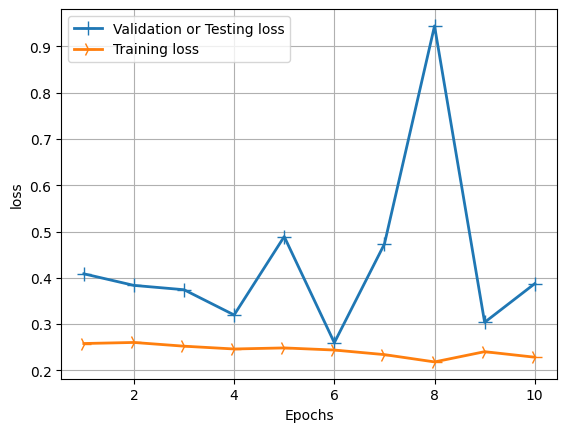

In [16]:
# A. Plotting the Loss Charts

classifier_dictionary = history.history
training_loss_values = classifier_dictionary['loss']
validation_loss_values = classifier_dictionary['val_loss']
epochs = range(1, len(training_loss_values) + 1)

line1 = plt.plot(epochs, validation_loss_values, label = 'Validation or Testing loss')
line2 = plt.plot(epochs, training_loss_values, label = 'Training loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

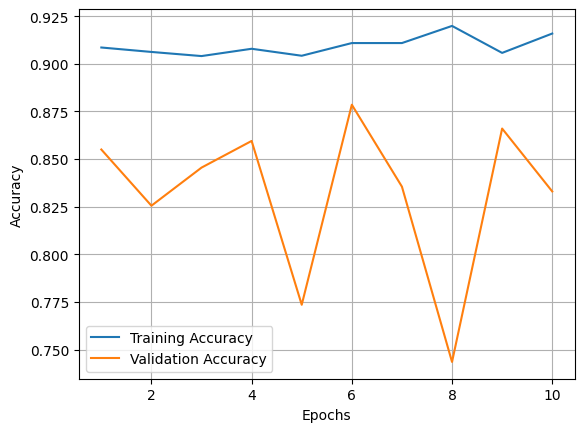

In [17]:
classifier_dictionary = history.history

training_accuracy_values = classifier_dictionary['accuracy']
validation_accuracy_values = classifier_dictionary['val_accuracy']
epochs = range(1, len(training_accuracy_values) + 1)

plt.plot(epochs, training_accuracy_values, label="Training Accuracy")
plt.plot(epochs, validation_accuracy_values, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

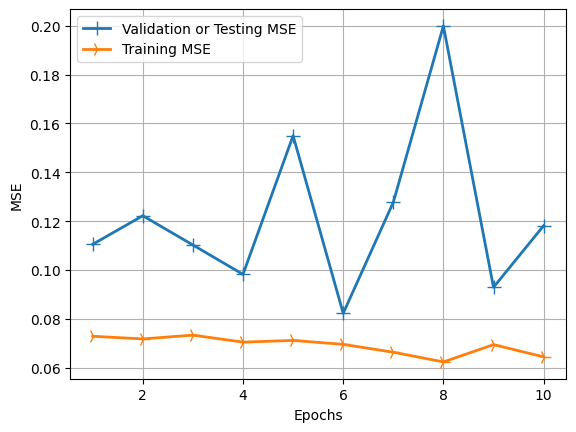

In [18]:
# C. Plotting the MSE Charts

classifier_dictionary = history.history

training_mse_values = classifier_dictionary['mse']
validation_mse_values = classifier_dictionary['val_mse']
epochs = range(1, len(training_mse_values) + 1)

line1 = plt.plot(epochs, validation_mse_values, label = 'Validation or Testing MSE')
line2 = plt.plot(epochs, training_mse_values, label = 'Training MSE')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
evaluation_results = best_model.evaluate(testing_set, batch_size=64, verbose=1)
for metric_name, metric_value in zip(best_model.metrics_names, evaluation_results):
    print(f'{metric_name}: {metric_value}')

prediction_proba = best_model.predict(testing_set)
prediction = np.rint(prediction_proba)

testing_dataset_labels = testing_set.classes
 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_dataset_labels, prediction)

125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.8360 - loss: 0.4044 - mse: 0.1210
loss: 0.3829058110713959
compile_metrics: 0.8454999923706055
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step


In [ ]:
# Save the model in TensorFlow SavedModel format
best_model.save("CNN_BEST_MODEL.h5")

print("Classifier Saved in the Disk")

Classifier Saved in the Disk


Text(95.72222222222221, 0.5, 'Actual Value')

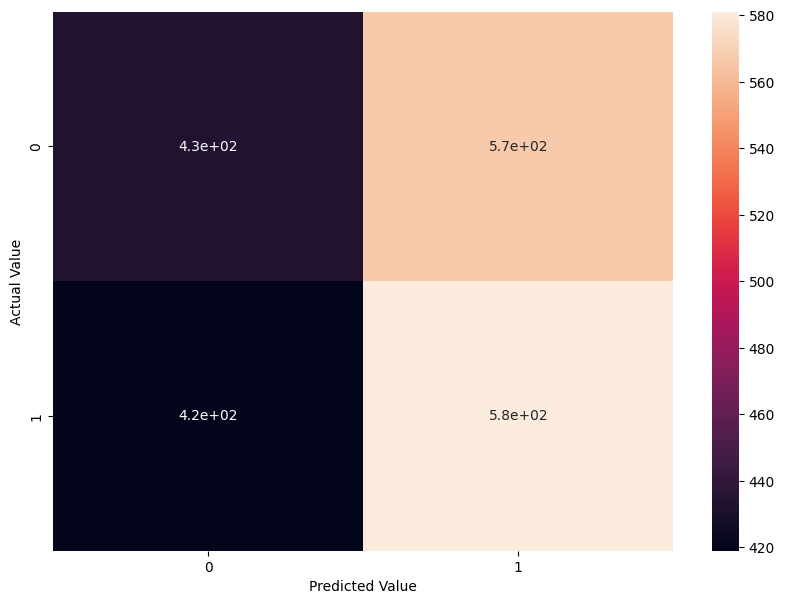

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [22]:
# C. Computing the Hold-out Accuracy

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Hold-out Accuracy:")
print(accuracy)
print(" ")

Hold-out Accuracy:
0.507
 


In [23]:
# D. Generating the Classification report

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(testing_dataset_labels, prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47      1000
           1       0.51      0.58      0.54      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



In [24]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

In [25]:
# A. For the Classification Accuracy
# Overall, how often is the classifier correct?
# It is the proportion of correct predictions over the total number of predictions.

from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(testing_dataset_labels, prediction)
print("Classification Accuracy: %.4f"
      %classification_accuracy)
print(' ')

Classification Accuracy: 0.5070
 


In [27]:
# C. For the Sensitivity, Recall Score, Probability of Detection, or True Positive Rate
# When the actual value is positive, how often is the prediction correct?
# Out of all actual Positives, how many did we predict as Positive?

from sklearn.metrics import recall_score
sensitivity = recall_score(testing_dataset_labels, prediction)
print('Sensitivity: %.4f' 
      % sensitivity)
print(' ')

Sensitivity: 0.5810
 


In [28]:
# D. For the Specificity or True Negative Rate
# When the actual value is negative, how often is the prediction correct?
# Out of all actual Negatives, how many did we predict as Negative?

specificity = TN / (TN + FP)
print('Specificity: %.4f' 
      % specificity)
print(' ')

Specificity: 0.4330
 


In [29]:
# E. For the False Positive Rate
# When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = 1 - specificity
print('False Positive Rate: %.4f' 
      % false_positive_rate)
print(' ')

False Positive Rate: 0.5670
 


In [30]:
# F. For the Precision or Positive Predictive Value 
# When a positive value is predicted, how often is the prediction correct?
# Out of all predicted Positive cases, how many were actually Positive?

from sklearn.metrics import precision_score
precision = precision_score(testing_dataset_labels, prediction)
print('Precision: %.4f' 
      % precision)
print(' ')

Precision: 0.5061
 


In [31]:
# G. For the F1-Score
 # It is the harmonic, or weighted, an average of Precision and Sensitivity.

from sklearn.metrics import f1_score
f1_score = f1_score(testing_dataset_labels, prediction)
print('F1-Score: %.4f' 
      % f1_score)
print(' ')

F1-Score: 0.5410
 


In [32]:
# H. For the Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(testing_dataset_labels, prediction)

Text(0, 0.5, 'Recall')

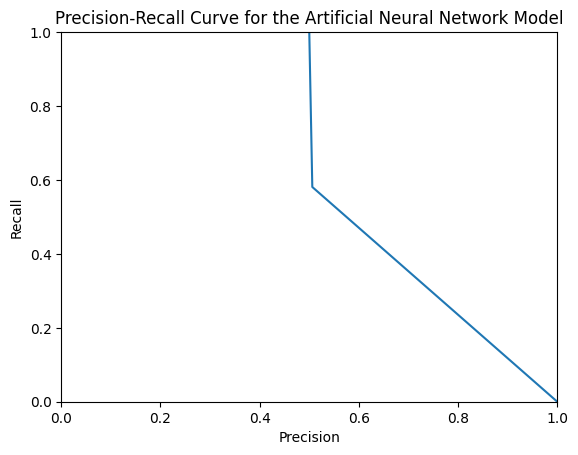

In [33]:
# I. For the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_value, recall_value, threshold = precision_recall_curve(testing_dataset_labels, prediction)

plt.plot(precision_value, recall_value)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision-Recall Curve for the Artificial Neural Network Model")
plt.xlabel("Precision")
plt.ylabel("Recall")

(0.0, 1.0)

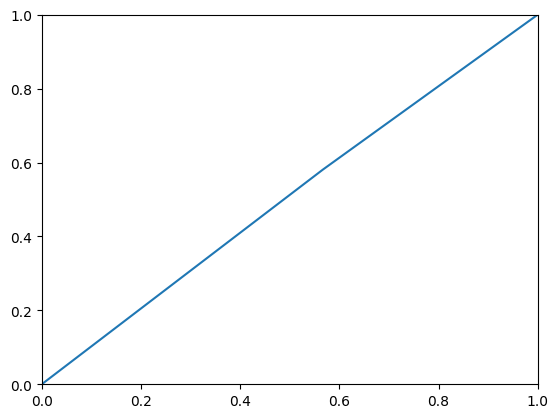

In [34]:
# J. For The ROC Curve with AUC
# J.1. For the Receiver Operating Curve (ROC)

from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(testing_dataset_labels, prediction)

# J.2. For the Area Under the Curve (AUC)

from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score(testing_dataset_labels, prediction)

# J.3. To Plot the ROC Curve with AUC

plt.plot(FPR, TPR, label = "ROC Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])

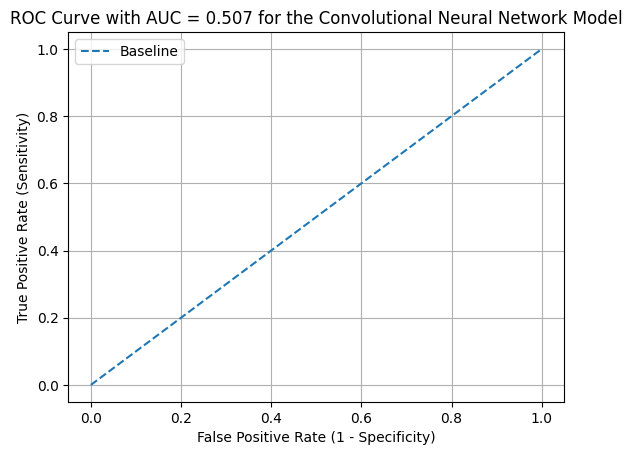

In [35]:
# J.4. For the Plot of Baseline for AUC

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Baseline', linestyle='--')
plt.title(f'ROC Curve with AUC = {round(AUC_score,4)} for the Convolutional Neural Network Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend();
plt.grid(True)
plt.show()

# REPEATING PART 6 B: PERFORM CROSS VALIDATION TO ASSESS THE CNN MODEL'S PERFORMANCE

In [39]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras_tuner import RandomSearch, Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Ftrl

# Define the model for hyperparameter tuning
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=256, step=64), kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=256, step=64), kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy','mse'])
    return model

In [40]:
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier

best_model1 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)
k_fold = StratifiedKFold(n_splits = 2, shuffle = True, random_state=42)
 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming you have already loaded the train_data DataFrame
train_images = []
train_labels = []

for idx, row in train_data.iterrows():
    img_path = row['images']
    label = row['labels']
    img = load_img(img_path, target_size=(128, 128))  # Specify the desired image size
    img_array = img_to_array(img) / 255.0  # Normalize the pixel values to [0, 1]
    train_images.append(img_array)
    if label == "Fire":
        train_labels.append(0)
    else:
        train_labels.append(1)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [42]:
# Using Accuracy as Scoring Metric for Cross-Validation
accuracy = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring="accuracy", n_jobs=1, error_score='raise')
accuracy_average = accuracy.mean()
accuracy_standard_deviation = accuracy.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.7000 - loss: 0.6005 - mse: 0.1977
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.8488 - loss: 0.3414 - mse: 0.1055
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.9024 - loss: 0.2501 - mse: 0.0735
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9281 - loss: 0.1823 - mse: 0.0546
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.9520 - loss: 0.1295 - mse: 0.0375
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9574 - loss: 0.1022 - mse: 0.0295
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.9725 - loss: 0.0782 - mse: 0.0226
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.9727 - loss: 0.0698 - mse: 0.0201
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 284ms/step - accuracy: 0.9810 - loss: 0.0575 - mse: 0.0155
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.9800 - loss: 0.0532 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.7330 - loss: 0.5613 - mse: 0.1858
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.8757 - loss: 0.3056 - mse: 0.0920
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.9033 - loss: 0.2338 - mse: 0.0690
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9402 - loss: 0.1624 - mse: 0.0458
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9518 - loss: 0.1316 - mse: 0.0380
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9608 - loss: 0.1126 - mse: 0.0322
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9608 - loss: 0.1032 - mse: 0.0295
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.9714 - loss: 0.0727 - mse: 0.0200
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9793 - loss: 0.0506 - mse: 0.0148
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.9755 - loss: 0.0628 - m

In [43]:
print("ACCURACY OF K-FOLDS:")
print(accuracy)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracy_average)
print('')
print("ACCURACY DEVIATION OF K-FOLDS:")
print(accuracy_standard_deviation)
print('')

ACCURACY OF K-FOLDS:
[0.87241839 0.81206265]

AVERAGE ACCURACY OF K-FOLDS:
0.8422405167631221

ACCURACY DEVIATION OF K-FOLDS:
0.030177870978383647



In [44]:
# Using Precision as Scoring Metric for Cross-Validation
precision_scorer = make_scorer(precision_score, average='weighted')
precision = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=precision_scorer, n_jobs=1, error_score='raise')
precision_average = precision.mean()
precision_standard_deviation = precision.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step - accuracy: 0.7054 - loss: 0.5863 - mse: 0.1936
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.8713 - loss: 0.3057 - mse: 0.0943
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 293ms/step - accuracy: 0.9019 - loss: 0.2377 - mse: 0.0717
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.9375 - loss: 0.1705 - mse: 0.0491
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9439 - loss: 0.1345 - mse: 0.0401
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.9618 - loss: 0.0930 - mse: 0.0260
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9641 - loss: 0.1094 - mse: 0.0303
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9712 - loss: 0.0794 - mse: 0.0224
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9849 - loss: 0.0460 - mse: 0.0124
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.9848 - loss: 0.0439 - m

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.7401 - loss: 0.5630 - mse: 0.1814
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.8740 - loss: 0.3159 - mse: 0.0959
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9189 - loss: 0.2009 - mse: 0.0587
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.9316 - loss: 0.1714 - mse: 0.0510
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.9618 - loss: 0.1133 - mse: 0.0317
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 296ms/step - accuracy: 0.9637 - loss: 0.1005 - mse: 0.0276
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.9662 - loss: 0.0777 - mse: 0.0221
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.9711 - loss: 0.0687 - mse: 0.0201
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.9779 - loss: 0.0549 - mse: 0.0154
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.9890 - loss: 0.0361 - m

In [45]:
print("PRECISION OF K-FOLDS:")
print(precision)
print('')
print("AVERAGE PRECISION OF K-FOLDS:")
print(precision_average)
print('')
print("PRECISION DEVIATION OF K-FOLDS:")
print(precision_standard_deviation)
print('')

PRECISION OF K-FOLDS:
[0.87308284 0.87887226]

AVERAGE PRECISION OF K-FOLDS:
0.8759775507794083

PRECISION DEVIATION OF K-FOLDS:
0.002894710512998777



In [64]:
# Using Recall as Scoring Metric for Cross-Validation
recall_scorer = make_scorer(recall_score, average='weighted')
recall = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=recall_scorer, n_jobs=1, error_score='raise')
recall_average = recall.mean()
recall_standard_deviation = recall.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.6897 - loss: 0.6714 - mse: 0.2185
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8213 - loss: 0.3982 - mse: 0.1239
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.8741 - loss: 0.3036 - mse: 0.0917
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8896 - loss: 0.2608 - mse: 0.0801
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9193 - loss: 0.2121 - mse: 0.0625
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9316 - loss: 0.1638 - mse: 0.0493
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9555 - loss: 0.1170 - mse: 0.0338
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9503 - loss: 0.1210 - mse: 0.0349
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9361 - loss: 0.1537 - mse: 0.0453
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9697 - loss: 

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.7216 - loss: 0.6031 - mse: 0.1911
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8564 - loss: 0.3613 - mse: 0.1075
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.8812 - loss: 0.2972 - mse: 0.0898
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.8992 - loss: 0.2563 - mse: 0.0769
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9268 - loss: 0.1834 - mse: 0.0536
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9367 - loss: 0.1603 - mse: 0.0476
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.9488 - loss: 0.1384 - mse: 0.0387
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9594 - loss: 0.1265 - mse: 0.0345
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9640 - loss: 0.0886 - mse: 0.0244
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9540 - loss: 

In [65]:
print("RECALL OF K-FOLDS:")
print(recall)
print('')
print("AVERAGE RECALL OF K-FOLDS:")
print(recall_average)
print('')
print("RECALL DEVIATION OF K-FOLDS:")
print(recall_standard_deviation)
print('')

RECALL OF K-FOLDS:
[0.92338441 0.88637121]

AVERAGE RECALL OF K-FOLDS:
0.9048778099949362

RECALL DEVIATION OF K-FOLDS:
0.01850660039813512



In [66]:
# Using F1-Score as Scoring Metric for Cross-Validation
f1_scorer = make_scorer(f1_score, average='weighted')
f1 = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=f1_scorer, n_jobs=1, error_score='raise')
f1_average = f1.mean()
f1_standard_deviation = f1.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.6777 - loss: 0.6615 - mse: 0.2164
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.8300 - loss: 0.3968 - mse: 0.1211
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8779 - loss: 0.2894 - mse: 0.0871
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.9095 - loss: 0.2352 - mse: 0.0669
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.9217 - loss: 0.2147 - mse: 0.0627
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9400 - loss: 0.1682 - mse: 0.0481
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9466 - loss: 0.1319 - mse: 0.0383
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9453 - loss: 0.1393 - mse: 0.0407
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9564 - loss: 0.1221 - mse: 0.0335
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9571 - loss: 

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.7062 - loss: 0.6215 - mse: 0.1983
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.8512 - loss: 0.3922 - mse: 0.1161
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8721 - loss: 0.3107 - mse: 0.0934
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8976 - loss: 0.2434 - mse: 0.0720
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9210 - loss: 0.2027 - mse: 0.0615
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9444 - loss: 0.1554 - mse: 0.0438
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.9472 - loss: 0.1260 - mse: 0.0366
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.9551 - loss: 0.1286 - mse: 0.0348
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9726 - loss: 0.0777 - mse: 0.0213
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9682 - loss: 

In [67]:
print("F1 SCORE OF K-FOLDS:")
print(f1)
print('')
print("AVERAGE F1 SCORE OF K-FOLDS:")
print(f1_average)
print('')
print("F1 SCORE DEVIATION OF K-FOLDS:")
print(f1_standard_deviation)
print('')

F1 SCORE OF K-FOLDS:
[0.90036255 0.88699323]

AVERAGE F1 SCORE OF K-FOLDS:
0.8936778927661847

F1 SCORE DEVIATION OF K-FOLDS:
0.006684658656667453



In [76]:
# Using ROC AUC as Scoring Metric for Cross-Validation (binary classification)
roc_auc_scorer = make_scorer(roc_auc_score)
roc_auc = cross_val_score(estimator=best_model1, X=train_images, y=train_labels, cv=k_fold, scoring=roc_auc_scorer, n_jobs=1, error_score='raise')
roc_auc_average = roc_auc.mean()
roc_auc_standard_deviation = roc_auc.std()

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.6890 - loss: 0.6504 - mse: 0.2108
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8178 - loss: 0.4175 - mse: 0.1297
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8828 - loss: 0.2812 - mse: 0.0862
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9145 - loss: 0.2053 - mse: 0.0614
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9322 - loss: 0.1775 - mse: 0.0525
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9309 - loss: 0.1849 - mse: 0.0549
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9498 - loss: 0.1248 - mse: 0.0365
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9478 - loss: 0.1261 - mse: 0.0373
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9574 - loss: 0.1202 - mse: 0.0324
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9659 - loss: 

C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\bened\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.7218 - loss: 0.6176 - mse: 0.1920
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.8383 - loss: 0.3959 - mse: 0.1207
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8788 - loss: 0.2821 - mse: 0.0856
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9118 - loss: 0.2184 - mse: 0.0646
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9260 - loss: 0.1926 - mse: 0.0563
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9448 - loss: 0.1387 - mse: 0.0412
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9437 - loss: 0.1373 - mse: 0.0400
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.9554 - loss: 0.1151 - mse: 0.0328
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9607 - loss: 0.1019 - mse: 0.0295
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9657 - loss: 

In [77]:
print("ROC AUC SCORE OF K-FOLDS:")
print(roc_auc)
print('')
print("AVERAGE ROC AUC SCORE OF K-FOLDS:")
print(roc_auc_average)
print('')
print("ROC AUC SCORE DEVIATION OF K-FOLDS:")
print(roc_auc_standard_deviation)
print('')

ROC AUC SCORE OF K-FOLDS:
[0.82915801 0.90602176]

AVERAGE ROC AUC SCORE OF K-FOLDS:
0.8675898874045502

ROC AUC SCORE DEVIATION OF K-FOLDS:
0.03843187586438157



# REPEATING PART 7: MAKING SINGLE PREDICTION

In [46]:
# Import the Keras Libraries and Packages

from keras.utils import load_img
from keras.utils import img_to_array

In [47]:
# A. To Load the Trained Model

from keras.models import load_model
classifier = load_model("CNN_BEST_MODEL.h5")

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(124, 124))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training

prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] > 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Raw prediction probability: 7.110891e-05
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Fire


In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = load_img("dataset/single_prediction/fire_test.jpg", target_size=(124, 124))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale like in training

prediction = classifier.predict(test_image)
print("Raw prediction probability:", prediction[0][0])

# Check class indices
print("Class indices:", training_set.class_indices)

# Adjust logic based on mapping
if prediction[0][0] < 0.5:
    result = 'Fire' if training_set.class_indices['Fire'] == 1 else 'Non-Fire'
else:
    result = 'Non-Fire' if training_set.class_indices['Fire'] == 1 else 'Fire'

print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Raw prediction probability: 7.110891e-05
Class indices: {'Fire': 0, 'Non': 1}
Prediction: Non-Fire
